<a href="https://colab.research.google.com/github/amytieu/Amy-The-Analyst/blob/main/Movie_Industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The Movie Industry**

## According to Statista, the film industry took a hit in 2020 during the pandemic. The U.S., despite being a major player in motion picture production and distribution, saw its box office revenue drastically declined. For the first time, China surpassed North America, especially both the US and Canada, in box office revenue.
<a href="https://www.statista.com/statistics/187069/north-american-box-office-gross-revenue-since-1980/" rel="nofollow"><img src="https://www.statista.com/graphic/1/187069/north-american-box-office-gross-revenue-since-1980.jpg" alt="Statistic: Box office revenue in the United States and Canada from 1980 to 2021 (in billion U.S. dollars) | Statista" style="width: 100%; height: auto !important; max-width:1000px;-ms-interpolation-mode: bicubic;"/></a><br /></a>
## (Sources: https://www.statista.com/topics/964/film/#topicHeader__wrapper)
## What does this mean to the movie industry? Is the industry dying? Is there any type of movie that could be produced to attract moviegoers back to the theaters? 
## In this project, I will take a look at the ‘Movie Industry’ dataset from Kaggle. The data spans from 1980 to 2020. A 40-year dataset is a great place to explore and analyze movie trends in terms of gross revenue in relation to the budget needed to produce the movies.
## The hypotheses I will be testing are: 
## **Hypothesis 1: Is there any difference in gross revenue between genres:**
### 1.1 Comedy and action
### 1.2 Horror and animation
## **Hypothesis 2: Is there any difference in budget between genres:**
### 2.1 Comedy and action
### 2.2 Horror and animation

# Mounting Google Drive and Import Libraries/Functions

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
import pandas as pd
import math
from scipy import stats
from scipy.stats import ttest_ind
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# The dataset - "Movie Industry - Four Decades of Movies"
## You can find the dataset here: https://www.kaggle.com/danielgrijalvas/movies?select=movies.csv
## The dataset belongs to Deniel Grijalva and it is collected by scraping the HTML from IMDb using a Python script.
## It has 7668 rows and 15 columns. The features of the data includes: name, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime.
## In this project, I mainly focus on these data:
 - name: string
 - genre: categorical nominal
 - year: categorical nominal
 - budget: quantitative continuous
 - gross: quantitative continuous

## Let's load the data and look at its contents


In [ ]:
# Load the dataset from Google Drive
movies_df = pd.read_csv('/content/gdrive/My Drive/THINKFUL - CAPSTONE PROJECT/movies.csv')
movies_df.info()
movies_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


(7668, 15)

In [ ]:
# Check the first two rows of the dataset
movies_df.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0


## Some columns, like 'budget' and 'gross', have missing values. I will filter out the missing values and work on a clean dataset

In [ ]:
# Clean NaN values
clean_df = movies_df.dropna()
clean_df.shape

(5421, 15)

## There are only 5421 movies now. 
## Because I want to work with the gross revenue and budget data for each genres. I will now take a look at the genres in this dataset

In [ ]:
# How many movie genres are there?
genres = clean_df['genre'].nunique()
genres

15

In [ ]:
# What are the genres and the total movie count for each genre 
genre_counts = clean_df['genre'].value_counts()
genre_counts

Comedy       1496
Action       1415
Drama         863
Crime         399
Adventure     327
Biography     311
Animation     277
Horror        251
Fantasy        41
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: genre, dtype: int64

## There are 15 movie genres: Comedy, Action, Drama, Crime, Adventure,Biography, Animation, Horror, Fantasy, Mystery, Thriller, Sci-Fi, Romance, Family, Western

Text(0.5, 1.0, 'Movie Count by Genre')

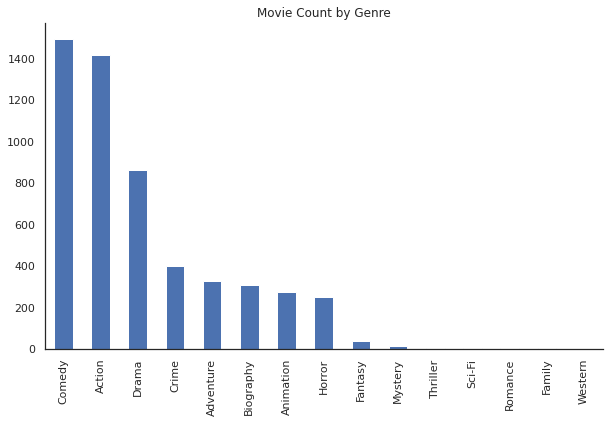

In [ ]:
# Let see this data (genres and movie counts by genre) in a chart
sns.set_style('white')
plt.figure(figsize=(10,6))
clean_df['genre'].value_counts().plot(kind='bar')
sns.despine()
plt.title('Movie Count by Genre')

## For each testing hypothesis, I need a set of two genres with approximately similar sample sizes
## Each sample size needs to be equal to or greater than 30 to be considered sufficient for the Central Limit Theorem to hold
## That is why I chose to test Comedy and Action, and Animation and Horror
## Before testing the hypotheses, I will create separate dataframes for each above mentioned genres
## I will also create a function to calculate confidence intervals



In [ ]:
# Create dataframes filtered by genre
comedy_df = clean_df.loc[clean_df['genre'] == 'Comedy']
action_df = clean_df.loc[clean_df['genre'] == 'Action']
animation_df = clean_df.loc[clean_df['genre'] == 'Animation']
horror_df = clean_df.loc[clean_df['genre'] == 'Horror']

In [ ]:
# A function for confidence interval calculation
def get_95_ci(array_1, array_2):
  sample_1_n = array_1.shape[0]
  sample_2_n = array_2.shape[0]
  sample_1_mean = array_1.mean()
  sample_2_mean = array_2.mean()
  sample_1_var = array_1.var()
  sample_2_var = array_2.var()
  mean_difference = sample_2_mean - sample_1_mean
  std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
  margin_of_error = 1.96 * std_err_difference
  ci_lower = mean_difference - margin_of_error
  ci_upper = mean_difference + margin_of_error
  return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

# **Hypothesis 1 - Gross revenue difference**

## 1.1 Is there a difference in gross revenue between action and comedy?
### Let's take a look at their descriptive stats using `describe()`

In [ ]:
# Run descriptive statistics for gross revenues of comedy and action, respectively
print(comedy_df['gross'].describe(), '\n')
print(action_df['gross'].describe())

count    1.496000e+03
mean     5.916766e+07
std      8.077252e+07
min      3.090000e+02
25%      8.572908e+06
50%      2.739483e+07
75%      7.374322e+07
max      6.112578e+08
Name: gross, dtype: float64 

count    1.415000e+03
mean     1.680232e+08
std      2.621981e+08
min      2.970000e+03
25%      1.914032e+07
50%      7.141673e+07
75%      2.011364e+08
max      2.847246e+09
Name: gross, dtype: float64


### It seems there is quite a difference in gross revenue between action and comedy movies. But, let's peform t-test to be sure
### H₀: µ₁ - µ₂ = 0
### Hₐ: µ₁ - µ₂ ≠ 0

Ttest_indResult(statistic=-15.308348758866371, pvalue=6.171106513944442e-51)
The difference in means at the 95% confidence interval (two-tail) is between 94593805.01200336 and 123117334.93540126.


Text(0, 0.5, 'Gross Revenue in Billions')

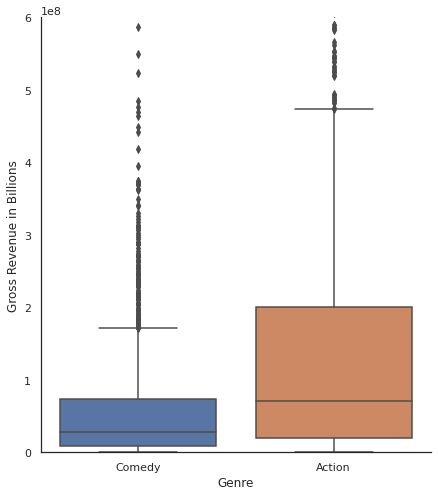

In [ ]:
# T-test
print(stats.ttest_ind(comedy_df['gross'], action_df['gross']))

# Confidence Interval
print(get_95_ci(comedy_df['gross'], action_df['gross']))

# Use 'boxplot()' to see this group of data through their quartiles
plt.figure(figsize=(7,8))
plt.ylim(0,600000000)
sns.boxplot(y='gross', x='genre', data=clean_df, order=['Comedy', 'Action'])
sns.despine()
plt.xlabel('Genre')
plt.ylabel('Gross Revenue in Billions')

### Hypothesis 1.1 results: 
- Reject the null hypothesis that there is no difference in gross revenue between comedy and action
- The difference is signifficant at p < 0.05
- With 95% confidence, the mean difference is between 94.5M and 123.12M

## 1.2 Is there a difference in gross revenue between horror and animation?
### H₀: µ₁ - µ₂ = 0
### Hₐ: µ₁ - µ₂ ≠ 0

In [ ]:
# Run descriptive statistics for gross revenues of horror and animation, respectively
print(horror_df['gross'].describe(), '\n')
print(animation_df['gross'].describe())

count    2.510000e+02
mean     5.681695e+07
std      7.883213e+07
min      2.270000e+03
25%      1.060807e+07
50%      3.055339e+07
75%      7.036024e+07
max      7.017964e+08
Name: gross, dtype: float64 

count    2.770000e+02
mean     2.811044e+08
std      2.917065e+08
min      3.037900e+04
25%      6.828284e+07
50%      1.923065e+08
75%      3.839307e+08
max      1.670728e+09
Name: gross, dtype: float64


Ttest_indResult(statistic=-11.796338056668581, pvalue=1.1713301221423657e-28)
The difference in means at the 95% confidence interval (two-tail) is between 188577047.37167513 and 259997778.02697575.


Text(0, 0.5, 'Gross Revenue in Billions')

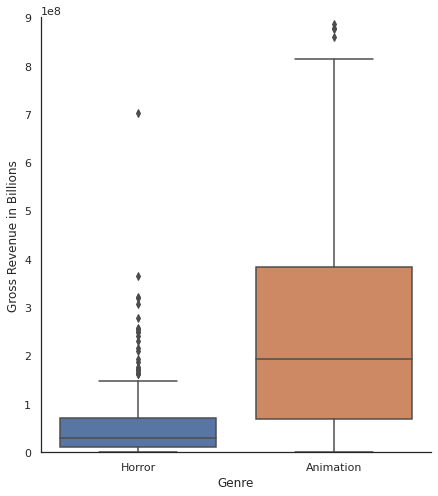

In [ ]:
# T-test
print(stats.ttest_ind(horror_df['gross'], animation_df['gross']))

# Confidence Interval
print(get_95_ci(horror_df['gross'], animation_df['gross']))

# Use 'boxplot()' to see this group of data through their quartiles
plt.figure(figsize=(7,8))
plt.ylim(0,900000000)
sns.boxplot(y='gross', x='genre', data=clean_df, order=['Horror', 'Animation'])
sns.despine()
plt.xlabel('Genre')
plt.ylabel('Gross Revenue in Billions')

### Hypothesis 1.2 results: 
- Reject the null hypothesis that there is no difference in gross revenue between horror and animation
- The difference is signifficant at p < 0.05
- With 95% confidence, the mean difference is between 188.6M and 260M

# **Hypothesis 2 - Budget difference**

## 2.1 Is there a difference in budget  between action and comedy?
### H₀: µ₁ - µ₂ = 0
### Hₐ: µ₁ - µ₂ ≠ 0

In [ ]:
# Run descriptive statistics for the budgets of comedy and action 
print(comedy_df['budget'].describe(),'\n')
print(action_df['budget'].describe())

count    1.496000e+03
mean     2.280237e+07
std      2.065020e+07
min      2.276900e+04
25%      8.000000e+06
50%      1.700000e+07
75%      3.000000e+07
max      1.750000e+08
Name: budget, dtype: float64 

count    1.415000e+03
mean     5.846856e+07
std      5.576153e+07
min      7.000000e+03
25%      2.000000e+07
50%      4.000000e+07
75%      8.000000e+07
max      3.560000e+08
Name: budget, dtype: float64


Ttest_indResult(statistic=-23.12007141560763, pvalue=1.0361804469184275e-108)
The difference in means at the 95% confidence interval (two-tail) is between 32578043.11317738 and 38754334.228051044.


Text(0, 0.5, 'Budget in Billions')

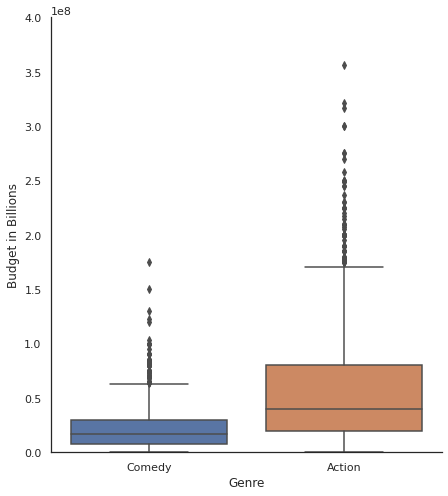

In [ ]:
# T-test
print(stats.ttest_ind(comedy_df['budget'], action_df['budget']))

# Confidence Interval
print(get_95_ci(comedy_df['budget'], action_df['budget']))

# Use 'boxplot()' to see this group of data through their quartiles
plt.figure(figsize=(7,8))
plt.ylim(0,400000000)
sns.boxplot(y='budget', x='genre', data=clean_df, order=['Comedy', 'Action'])
sns.despine()
plt.xlabel('Genre')
plt.ylabel('Budget in Billions')

### Hypothesis 2.1 results: 
- Reject the null hypothesis that there is no difference in budget between comedy and action
- The difference is signifficant at p < 0.05
- With 95% confidence, the mean difference is between 32.6M and 38.8M

## 2.1 Is there a difference in budget  between horror and animation?
### H₀: µ₁ - µ₂ = 0
### Hₐ: µ₁ - µ₂ ≠ 0

In [ ]:
# Descriptive statistics on budgets of horror and animation
print(horror_df['budget'].describe(), '\n')
print(animation_df['budget'].describe())

count    2.510000e+02
mean     1.343453e+07
std      1.506761e+07
min      1.500000e+04
25%      3.500000e+06
50%      1.000000e+07
75%      1.700000e+07
max      9.700000e+07
Name: budget, dtype: float64 

count    2.770000e+02
mean     7.632336e+07
std      5.467973e+07
min      7.000000e+04
25%      3.000000e+07
50%      7.000000e+07
75%      1.100000e+08
max      2.600000e+08
Name: budget, dtype: float64


Ttest_indResult(statistic=-17.623856442066774, pvalue=5.649723369093641e-55)
The difference in means at the 95% confidence interval (two-tail) is between 56185089.404222146 and 69592565.63626574.


Text(0, 0.5, 'Budget in Billions')

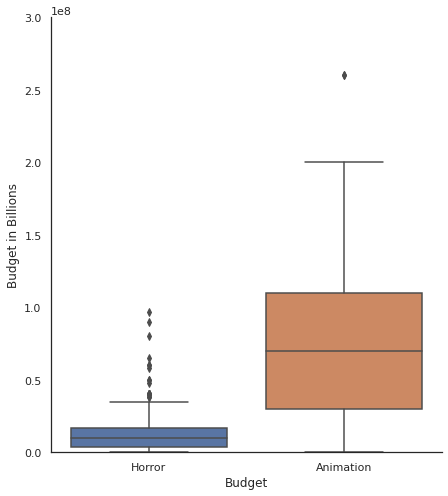

In [ ]:
# T-test
print(stats.ttest_ind(horror_df['budget'], animation_df['budget']))

# Confidence interval
print(get_95_ci(horror_df['budget'], animation_df['budget']))

# Box plot
plt.figure(figsize=(7,8))
plt.ylim(0,300000000)
sns.boxplot(y='budget', x='genre', data=clean_df, order=['Horror', 'Animation'])
sns.despine()
plt.xlabel('Budget')
plt.ylabel('Budget in Billions')

### Hypothesis 2.2 results:
- Reject the null hypothesis that there is no difference in budget between comedy and action
- The difference is signifficant at p < 0.05
- With 95% confidence, the mean difference is between 56.2M and 69.6M

# Gross Revenue and Budget Correlation
## My initial data exploration in Excel shows that there is a direct correlation between gross revenue and budget

Text(0.5, 1.0, 'Correlation Matrics')

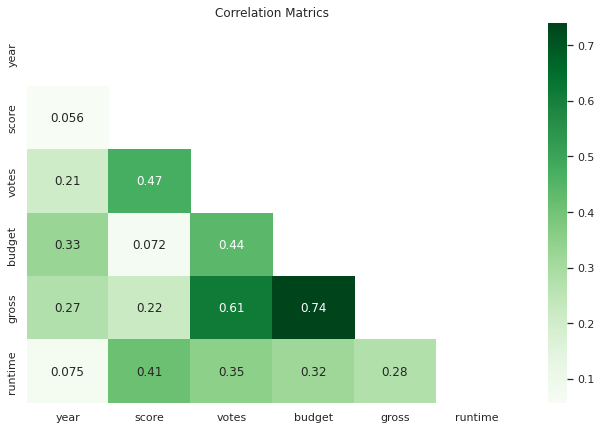

In [ ]:
# Check out the heatmap to see the correlation among variables in the dataset
correlation = np.triu(np.ones_like(clean_df.corr()))
plt.figure(figsize=(11,7))
sns.heatmap(clean_df.corr(), cmap="Greens", annot=True, mask=correlation)
plt.title('Correlation Matrics')

Text(0.5, 1.0, 'Budget and Gross Revenue')

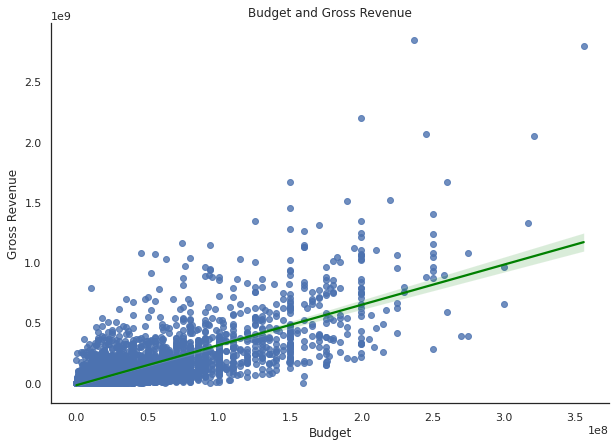

In [ ]:
# Regression plot between gross revenue and budget
plt.figure(figsize=(10,7))
sns.regplot(y=clean_df['gross'], x=clean_df['budget'], line_kws={'color': 'green'})
sns.despine()
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.title('Budget and Gross Revenue')

In [ ]:
# Pearson test
correlation, pvalue = stats.pearsonr(clean_df['gross'], clean_df['budget'])
print('Pearsons correlation: %.3f' % correlation, ' and p-value: {}'. format(pvalue))

Pearsons correlation: 0.740  and p-value: 0.0


## The regression plot and the heatmap already show that there is a positive corellation between budget and gross revenue of a movie
## The Pearson test confirms that. With p < 0.05, there is a correlation between the two variables. The correlation coefficient is 0.74 indicating a pretty strong positive corellation between them


# Top 5 genres
## Knowing that there is a high correlation between gross revenue and budget, my next step is to find out the top genres that require the highest budgets and generate the highest gross revenues

In [ ]:
top5_gross = clean_df.groupby('genre')['gross'].sum().nlargest(5).index
print('Top 5 Grossing Movies Genres: ', top5_gross.values)
top5_budget = clean_df.groupby('genre')['budget'].sum().nlargest(5).index
print('Top 5 Budgetting Movies Genres: ', top5_budget.values)

Top 5 Grossing Movies Genres:  ['Action' 'Comedy' 'Animation' 'Drama' 'Adventure']
Top 5 Budgetting Movies Genres:  ['Action' 'Comedy' 'Animation' 'Drama' 'Adventure']


## This, again, shows that budget and gross revenue are positively correlated. The top 5 genres that have the highest budgets and gross revenues are: Action, Comedy, Animation, Drama, and Adventure.

# Conclusion




## Gross Revenue 1980-2020 Chart

Text(0.5, 1.0, 'Gross Revenue 1980-2020')

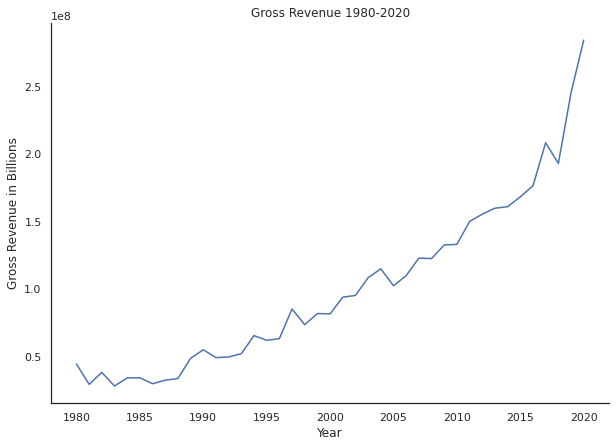

In [ ]:
plt.figure(figsize=(10,7))
sns.lineplot(x='year', y='gross', data=clean_df, ci=None)
sns.despine()
plt.xlabel('Year')
plt.ylabel('Gross Revenue in Billions')
plt.title('Gross Revenue 1980-2020')

## So, what is the purpose for all of this?
## Overall, I think that the movie industry is not dying, despite strong competition from streaming services like Netflix or Hulu, and the impact of the pandemic. 
## The 40 year trend shows that the gross revenue increased over the year
## I wanted to prove that there is a positive relationship between Budget and Gross Revenue. So, in order for the movie industry to regain its pre-pandemic momentum and attract moviegoers back to the theaters, filmmakers and producers should continue their focus on producing quality movies in the top 5 genres: Action, Comedy, Animation, Drama, and Adventure.
<img src="https://s3-us-west-2.amazonaws.com/prd-rteditorial/wp-content/uploads/2018/03/13153742/RT_300EssentialMovies_700X250.jpg" style="width: 100%; height: auto !important; max-width:1000px;-ms-interpolation-mode: bicubic;"/></a><br /></a>